# Users Survey

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import textwrap as tw

In [28]:
users_survey = pd.read_csv('./FinalDatasets/users/survey_all_users.csv')
questions_limits = pd.read_csv('./FinalDatasets/users/survey_limits_labels.csv')
users_size = 7
user_labels = []
for i in range(0, users_size):
    user_labels.append('User ' + str(i))

In [99]:
def formatQuestion(question, number):
    return '\\subsection{'+question+'} \\label{sec:survey-question-'+str(number)+'}\n\n'

def formatChart(question, number):
    x = ("\\begin{figure}[H]\n"
                "\\centering\n"
                "\\includegraphics[width=0.55\\linewidth]{media/img/results/8-survey/survey-question-"+str(number)+".pdf}\n"
                "\caption{Question "+str(number)+": "+question+"}\n"
                "\label{fig:survey-question-"+str(number)+"}\n"
            "\end{figure}\n")
    print(x)

def range_question(columnIndex):
    question = users_survey.iloc[:, columnIndex]
    if question.dtype != 'int64' or columnIndex == 1: #eclude pbjest and user id
        return
    print(formatQuestion(question.name, columnIndex - 1))
    
    #adjust if zero
    question_adjusted = []
    for q in question:
        if q == 0:
            question_adjusted.append(q + 0.1)
        else:
            question_adjusted.append(q)
    plt.figure()
    plt.barh(user_labels, question_adjusted)
    plt.title('Question ' + str(columnIndex - 1))

    ticks = np.arange(0, 11, 1)
    plt.xticks(ticks)
    low_text = questions_limits.iloc[columnIndex]['low']
    txt0 = plt.text(-1, -1.5, low_text,  ha='left', va = 'top', wrap = True)
    txt0._get_wrap_line_width = lambda : 100.
    high_text = questions_limits.iloc[columnIndex]['high']
    txt1 = plt.text(11, -1.5, high_text,  ha='right', va = 'top', wrap = True)
    txt1._get_wrap_line_width = lambda : 110.   
    plt.xlabel('---------------------------------------->\n\n\n')
    #plt.margins(y = 0.1)
    formatChart(question.name, columnIndex - 1)
    plt.savefig('figures/8-survey/survey-question-' + str(columnIndex - 1) + '.pdf', bbox_inches='tight')
    plt.show()
    
def check_yesno(question):
    for i in range(0, len(question)):
        try:
            if ('Yes' in question[i]) or ('No' in question[i]) or ('Maybe' in question[i]):
                continue
            else:
                return False
        except:
            return False
    return True

def yesno_question(columnIndex):
    question = users_survey.iloc[:, columnIndex]
    if not check_yesno(question):
        return
    print(formatQuestion(question.name, columnIndex - 1))
    plt.figure()
    data_yesno = []
    hasMaybe = False
    for i in range(0, len(question)):
        if question[i] == 'Yes':
            data_yesno.append(1)
        if question[i] == 'No':
            data_yesno.append(2)
        if question[i] == 'Maybe':
            data_yesno.append(3)
            hasMaybe = True

    plt.plot(data_yesno, np.arange(0, users_size, 1), 'D')
    plt.title('Question ' + str(columnIndex - 1))
    if hasMaybe:
        ticks = np.arange(0, 5, 1)
        plt.gca().set_xticklabels(['', 'Yes', 'No', 'Maybe', ''])
    else:
        ticks = np.arange(0, 4, 1)
        plt.gca().set_xticklabels(['', 'Yes', 'No', ''])
    plt.xticks(ticks)
    ticks = np.arange(0, users_size, 1)
    plt.yticks(ticks)
    plt.grid(visible = True, axis = 'y')
    plt.gca().set_yticklabels(user_labels)
    plt.margins(y = 0.15)
    formatChart(question.name, columnIndex - 1)
    plt.savefig('figures/8-survey/survey-question-' + str(columnIndex - 1) + '.pdf', bbox_inches='tight')
    plt.show()

def open_question(columnIndex):
    question = users_survey.iloc[:, columnIndex]
    if question.dtype == 'int64' or check_yesno(question) or columnIndex == 12:
        return
    print(formatQuestion(question.name, columnIndex - 1))
    with pd.option_context("max_colwidth", 10000):
        label = 'tab:survey-question-' + str(columnIndex)
        caption = question.name
        latex = question.to_latex(header = ['\textbf{Question '+str(columnIndex - 1)+'}'], column_format = '|p{0.1\linewidth}||p{0.9\linewidth}|', bold_rows = True, label = label)
        latex = latex.replace("\\textbf{", "\\textbf{User ")
        latex = latex.replace("extbf\\{", "\\textbf{")
        latex = latex.replace("\\}", "}")
#         latex = latex.replace("\\toprule", "\\hline")
#         latex = latex.replace("\\midrule", "\\hline \\hline")
#         latex = latex.replace("\\\\\n\\bottomrule", "\\\\")    
#         latex = latex.replace("\\\\", "\\\\ \n \\hline")
        
        #latex = latex.replace("{}", "\\textbf{Agent Size}")
        latex = latex.replace("\\toprule", "\\hline")
        latex = latex.replace("\\midrule", "\\hline \\hline")
        latex = latex.replace("\\bottomrule", "\\hline")
        latex = latex.replace("\\centering\n\\label{"+label+"}", "\\centering")
        latex = latex.replace("\\end{table}", "\\caption{"+caption+"}\n\\label{"+label+"}\n\\end{table}")
        latex = latex.replace("\\begin{table}", "\\begin{table}[H]")
        
        print(latex)

def options_xr_question(columnIndex):
    if(columnIndex != 12):
        return #hard coded
    
    question = users_survey.iloc[:, columnIndex]
    print(formatQuestion(question.name, columnIndex - 1))
    
    plt.figure()
    user_options = []
    for i in range(0, len(question)):
        data_option= [-1, -1, -1, -1, -1]
        if 'Augmented reality' in question[i]:
            data_option[1] = i
        if 'Virtual Reality' in question[i]:
            data_option[2] = i
        if 'Mixed Reality' in question[i]:
            data_option[3] = i
        user_options.append(data_option)

    for i in range(0, len(user_options)):
        plt.plot(np.arange(0, 5, 1), user_options[i], 'D', color = 'tab:blue')
    plt.title('Question ' + str(columnIndex - 1))
    ticks = np.arange(0, 5, 1)
    plt.gca().set_xticklabels(['', 'Augmented\nReality', 'Virtual\nReality', 'Mixed\nReality', ''])
    plt.xticks(ticks)
    ticks = np.arange(0, users_size, 1)
    plt.yticks(ticks)
    plt.grid(visible = True, axis = 'y')
    plt.gca().set_yticklabels(user_labels)
    plt.margins(y = 0.12)
    plt.ylim(bottom=-0.8)
    formatChart(question.name, columnIndex - 1)
    plt.savefig('figures/8-survey/survey-question-' + str(columnIndex - 1) + '.pdf', bbox_inches='tight')
    plt.show()

\chapter{User Survey} \label{appendix:survey}


\section{Musical Background} \label{appendix:sec:musicalbackground}


\subsection{Do you have a formal education in music?} \label{sec:survey-question-1}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-1.pdf}
\caption{Question 1: Do you have a formal education in music?}
\label{fig:survey-question-1}
\end{figure}



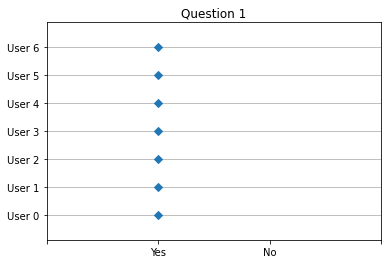

\subsection{What are the genres and/or styles of your interest?} \label{sec:survey-question-2}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                                     	\textbf{Question 2} \\
\hline \hline
\textbf{User 0} &                                                                                              Classical \\
\textbf{User 1} &                                                                                   Classical, Rock, Rap \\
\textbf{User 2} &                          Electronic music, dubstep, dub, ambient, techno, house, electroacoustic music \\
\textbf{User 3} &                                       Indierock, contemporary, electronic (early electronic), dreampop \\
\textbf{User 4} &                                                                                          Rock and jazz \\
\textbf{User 5} &  jazz, contemporary music, krautrock, techno, dru

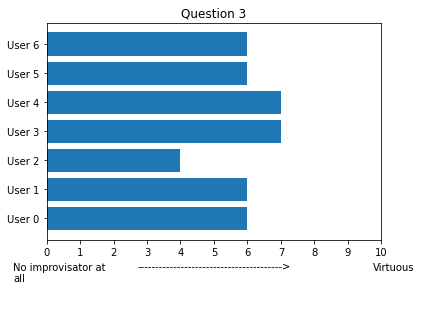

\subsection{Do you usually play with other musicians (band or others)?} \label{sec:survey-question-4}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-4.pdf}
\caption{Question 4: Do you usually play with other musicians (band or others)?}
\label{fig:survey-question-4}
\end{figure}



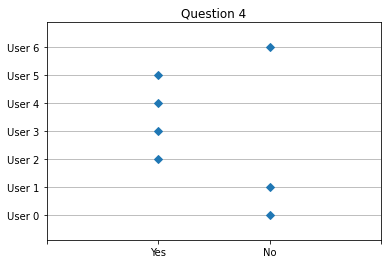

\subsection{Have you use a looper device (digital or analog) before?} \label{sec:survey-question-5}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-5.pdf}
\caption{Question 5: Have you use a looper device (digital or analog) before?}
\label{fig:survey-question-5}
\end{figure}



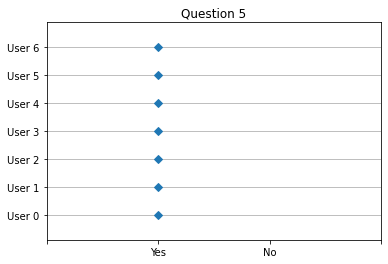

\subsection{If your answer to the previous looper question was positive, what device or tool have you used?} \label{sec:survey-question-6}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                             	\textbf{Question 6} \\
\hline \hline
\textbf{User 0} &                                                                                A guitar looper \\
\textbf{User 1} &                                                                        Loop Pedal, DAW Looping \\
\textbf{User 2} &                                                                                   Ableton Live \\
\textbf{User 3} &  Hologram Microcosm, TC Electronic Alter Ego, Boss RC30 ++ Also different looper apps (iPhone) \\
\textbf{User 4} &                                            Looper pedals for guitar, looping in Logic and Live \\
\textbf{User 5} &                                                      

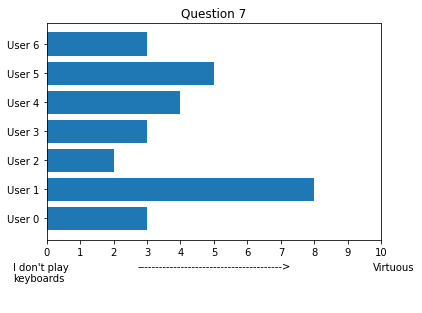

\subsection{What is your experience playing sound synthesizers?} \label{sec:survey-question-8}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-8.pdf}
\caption{Question 8: What is your experience playing sound synthesizers?}
\label{fig:survey-question-8}
\end{figure}



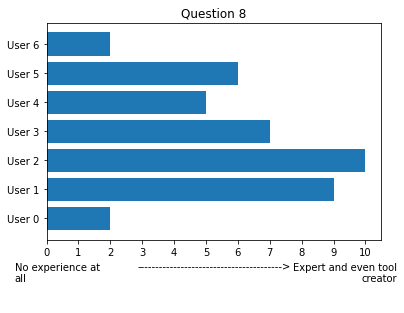

\subsection{Explain briefly the kind of music that you usually compose/perform.} \label{sec:survey-question-9}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                                                                                                                                                                                                                                                   	\textbf{Question 9} \\
\hline \hline
\textbf{User 0} &                                                                                                                                                                                                                                                                                                            Classical \\
\textbf{User 1} &                                                                                                                      

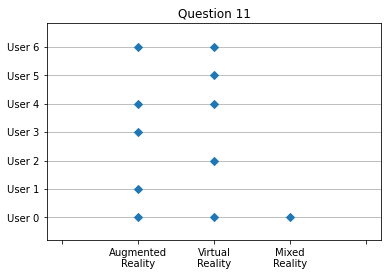

\section{Music Session Experience} \label{appendix:sec:surveymusicsession}


\subsection{Have you use the Microsoft HoloLens headset before?} \label{sec:survey-question-12}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-12.pdf}
\caption{Question 12: Have you use the Microsoft HoloLens headset before?}
\label{fig:survey-question-12}
\end{figure}



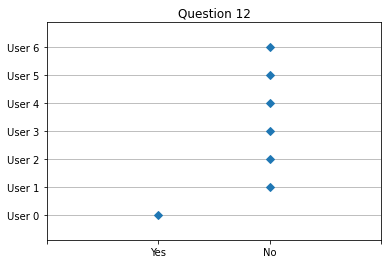

\subsection{Fluency for playing: Did you feel a significant amount of latency (a delay time between the moment you play a key and when you hear the generated sound) when performing? (NEGATIVE question)} \label{sec:survey-question-13}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-13.pdf}
\caption{Question 13: Fluency for playing: Did you feel a significant amount of latency (a delay time between the moment you play a key and when you hear the generated sound) when performing? (NEGATIVE question)}
\label{fig:survey-question-13}
\end{figure}



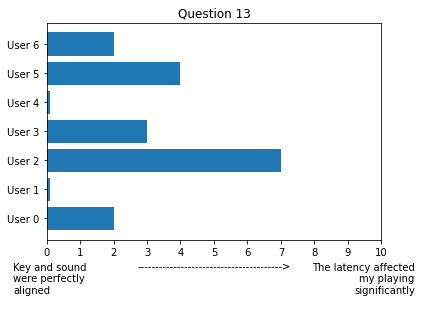

\subsection{Positioning: (Just in terms of SOUND - from the speakers array) When you move the rigid body (object tracked by the motion capture system), did you feel (hear) that the sound was aligned with the physical movement of the object? (while moving it)} \label{sec:survey-question-14}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-14.pdf}
\caption{Question 14: Positioning: (Just in terms of SOUND - from the speakers array) When you move the rigid body (object tracked by the motion capture system), did you feel (hear) that the sound was aligned with the physical movement of the object? (while moving it)}
\label{fig:survey-question-14}
\end{figure}



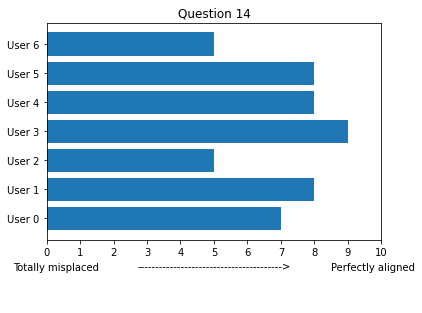

\subsection{Positioning: (Just in terms of IMAGE - from the HoloLens) When you move the rigid body (object tracked by the motion capture system), did you feel (see) that the image was aligned with the physical movement of the object? (while moving it)} \label{sec:survey-question-15}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-15.pdf}
\caption{Question 15: Positioning: (Just in terms of IMAGE - from the HoloLens) When you move the rigid body (object tracked by the motion capture system), did you feel (see) that the image was aligned with the physical movement of the object? (while moving it)}
\label{fig:survey-question-15}
\end{figure}



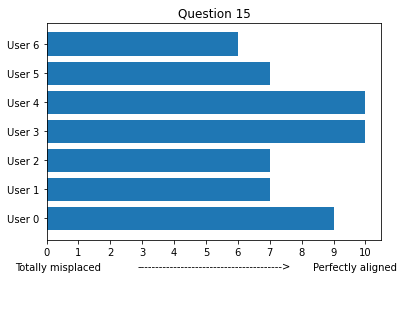

\subsection{Sound location: How easy was to identify (just in terms of SOUNDS from the loudspeakers array) the location of your sound source (sphere) when it MOVED FREELY ?} \label{sec:survey-question-16}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-16.pdf}
\caption{Question 16: Sound location: How easy was to identify (just in terms of SOUNDS from the loudspeakers array) the location of your sound source (sphere) when it MOVED FREELY ?}
\label{fig:survey-question-16}
\end{figure}



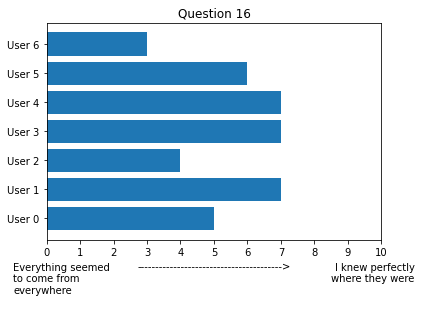

\subsection{Visual confirmation: Did you feel that the visual sound source (sphere in HoloLens) was aligned with the sound direction when MOVED FREELY? (e.g. when you were seeing one sphere going to your right side, was the sound following it behind or at the same time? )} \label{sec:survey-question-17}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-17.pdf}
\caption{Question 17: Visual confirmation: Did you feel that the visual sound source (sphere in HoloLens) was aligned with the sound direction when MOVED FREELY? (e.g. when you were seeing one sphere going to your right side, was the sound following it behind or at the same time? )}
\label{fig:survey-question-17}
\end{figure}



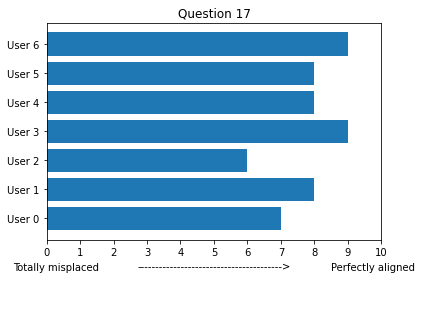

\subsection{Visual confirmation: If you didn't have a sphere in your field of view in the HoloLens (because it was probably in your side or behind), how easy was to identify its location and look for it?} \label{sec:survey-question-18}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-18.pdf}
\caption{Question 18: Visual confirmation: If you didn't have a sphere in your field of view in the HoloLens (because it was probably in your side or behind), how easy was to identify its location and look for it?}
\label{fig:survey-question-18}
\end{figure}



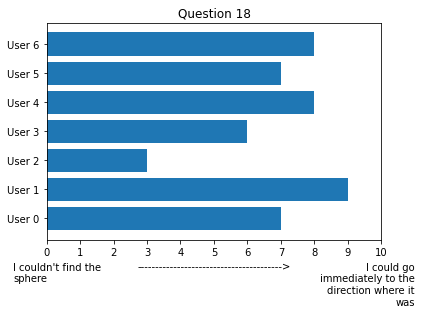

\subsection{Agent Interaction: How easy was to "release" (for autonomous movement) or "catch" (to control with the rigid body) a sphere in the air through the HoloLens?} \label{sec:survey-question-19}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-19.pdf}
\caption{Question 19: Agent Interaction: How easy was to "release" (for autonomous movement) or "catch" (to control with the rigid body) a sphere in the air through the HoloLens?}
\label{fig:survey-question-19}
\end{figure}



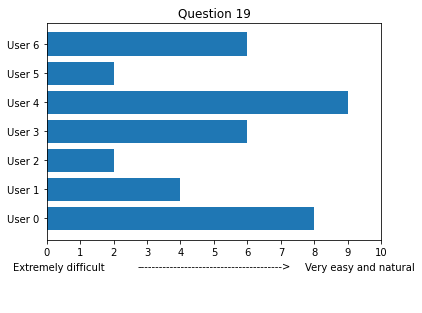

\subsection{Automatic Movement: How did you perceived the speed of the spheres when they were moving autonomously?} \label{sec:survey-question-20}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-20.pdf}
\caption{Question 20: Automatic Movement: How did you perceived the speed of the spheres when they were moving autonomously?}
\label{fig:survey-question-20}
\end{figure}



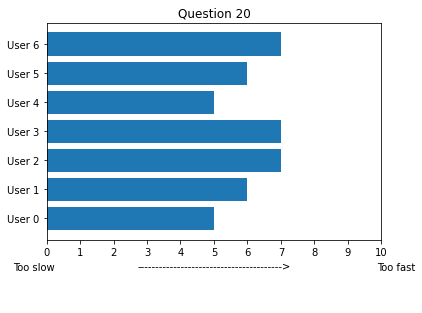

\subsection{Automatic Movement: Did you notice that spheres were, in some sense, following you?} \label{sec:survey-question-21}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-21.pdf}
\caption{Question 21: Automatic Movement: Did you notice that spheres were, in some sense, following you?}
\label{fig:survey-question-21}
\end{figure}



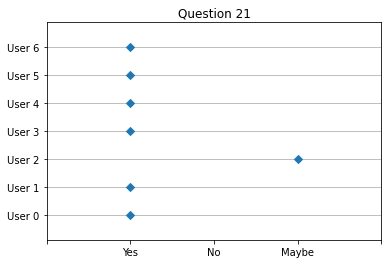

\subsection{Automatic Movement: How accurate do you think you can predict the trajectory of one of the spheres?} \label{sec:survey-question-22}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-22.pdf}
\caption{Question 22: Automatic Movement: How accurate do you think you can predict the trajectory of one of the spheres?}
\label{fig:survey-question-22}
\end{figure}



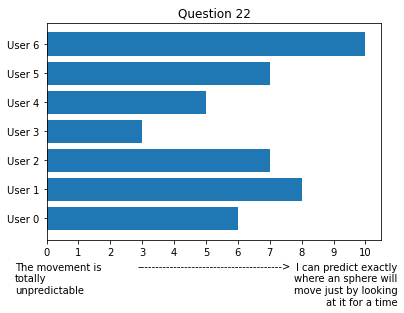

\subsection{Automatic Movement: To what extent (during the whole performance) you think that the spheres were spread equally around you or were grouped in specific directions when you look at them?} \label{sec:survey-question-23}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-23.pdf}
\caption{Question 23: Automatic Movement: To what extent (during the whole performance) you think that the spheres were spread equally around you or were grouped in specific directions when you look at them?}
\label{fig:survey-question-23}
\end{figure}



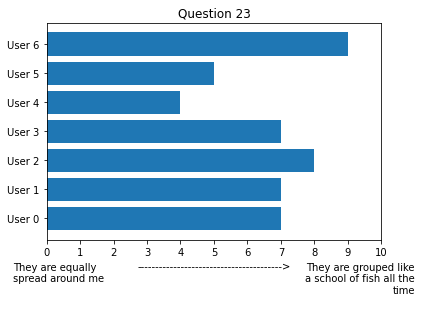

\subsection{Automatic Movement: According with your experience, describe the movement behavior of the spheres as a group.} \label{sec:survey-question-24}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                                                                                                                                                                                         	\textbf{Question 24} \\
\hline \hline
\textbf{User 0} &                                                                       They were going in different directions and with different speeds, but they tended to be a bit onesided of the whole "audio room". For instance; all of the spheres being behind me.  \\
\textbf{User 1} &                                                                                                                                                                                             

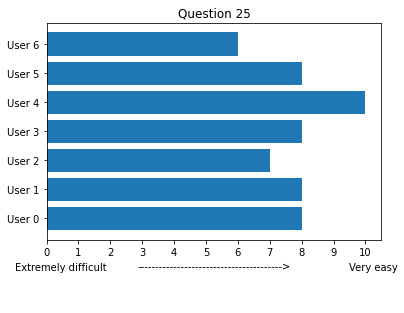

\subsection{Music Performance: Did you feel in total control of your music improvisation? } \label{sec:survey-question-26}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-26.pdf}
\caption{Question 26: Music Performance: Did you feel in total control of your music improvisation? }
\label{fig:survey-question-26}
\end{figure}



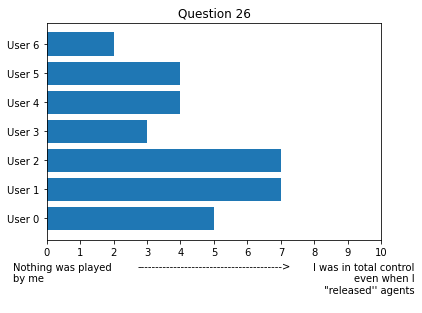

\subsection{Music Performance: Did you agree all the time with the musical material generated by the system?} \label{sec:survey-question-27}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-27.pdf}
\caption{Question 27: Music Performance: Did you agree all the time with the musical material generated by the system?}
\label{fig:survey-question-27}
\end{figure}



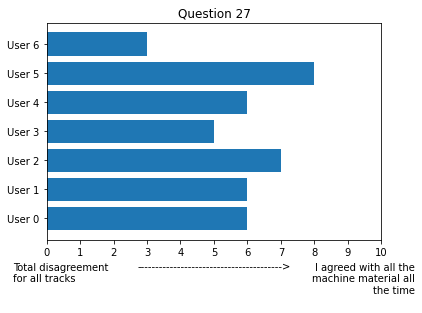

\subsection{Music Performance: Do you think that the machine was close to your playing style and composition/improvisation vision of your piece?} \label{sec:survey-question-28}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-28.pdf}
\caption{Question 28: Music Performance: Do you think that the machine was close to your playing style and composition/improvisation vision of your piece?}
\label{fig:survey-question-28}
\end{figure}



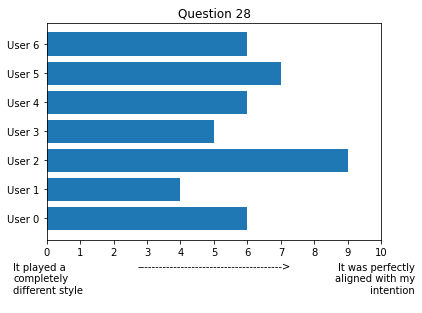

\subsection{Music performance: When the machine played its music, do you think it was in sync with the musical tempo (metronome)?} \label{sec:survey-question-29}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-29.pdf}
\caption{Question 29: Music performance: When the machine played its music, do you think it was in sync with the musical tempo (metronome)?}
\label{fig:survey-question-29}
\end{figure}



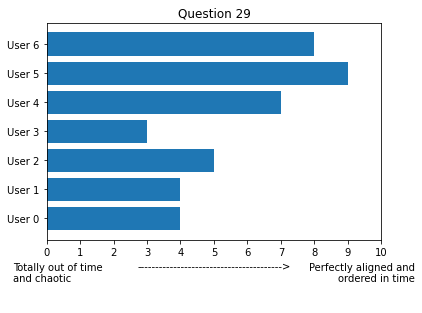

\subsection{Sound synthesis: How much did you change sound synthesis parameters (knobs in the keyboard) to find a sound that fits with your improvisation?} \label{sec:survey-question-30}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-30.pdf}
\caption{Question 30: Sound synthesis: How much did you change sound synthesis parameters (knobs in the keyboard) to find a sound that fits with your improvisation?}
\label{fig:survey-question-30}
\end{figure}



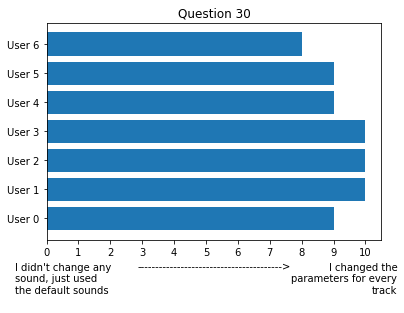

\subsection{Ergonomics: Did you feel the HoloLens headset comfortable during the whole session?} \label{sec:survey-question-31}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-31.pdf}
\caption{Question 31: Ergonomics: Did you feel the HoloLens headset comfortable during the whole session?}
\label{fig:survey-question-31}
\end{figure}



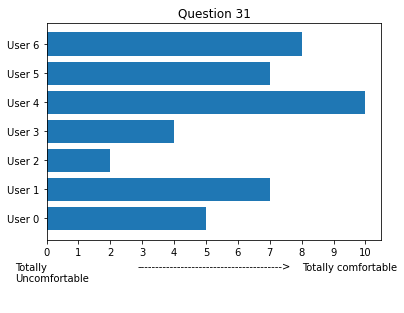

\subsection{Visualization: Did you feel limited by the "field of view" (area of the mini-screen in the glasses) of the HoloLens while performing? (NEGATIVE question)} \label{sec:survey-question-32}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-32.pdf}
\caption{Question 32: Visualization: Did you feel limited by the "field of view" (area of the mini-screen in the glasses) of the HoloLens while performing? (NEGATIVE question)}
\label{fig:survey-question-32}
\end{figure}



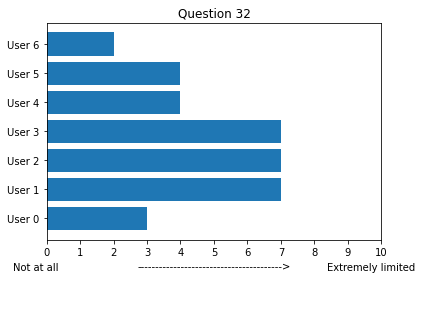

\subsection{Overall experience: Did you feel a well balanced sound mixing when you had several sound sources moving around the space?} \label{sec:survey-question-33}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-33.pdf}
\caption{Question 33: Overall experience: Did you feel a well balanced sound mixing when you had several sound sources moving around the space?}
\label{fig:survey-question-33}
\end{figure}



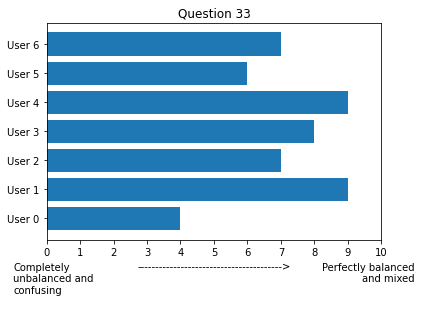

\subsection{Overall experience: How many tracks/agents/spheres you think you could manage in this kind of system? and Why? (The system was up to 8 but you can suggest a lower or higher number that you think is right for you)} \label{sec:survey-question-34}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                                                                                                                                                                                                                                                          	\textbf{Question 34} \\
\hline \hline
\textbf{User 0} &                                                                                                                                                    Hard to say, it depends on the lenght and complexity of the loops, but around 7-8 it was starting to become difficult to distinguish and keep trac

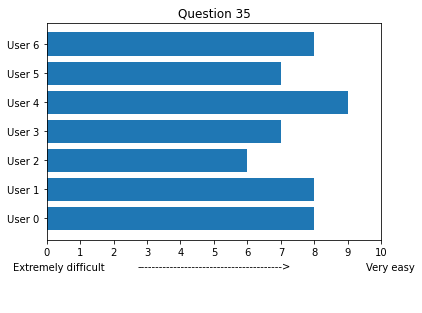

\subsection{Overall experience: How would you rate the AESTHETICS of the resulting music from your human-machine performance?} \label{sec:survey-question-36}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-36.pdf}
\caption{Question 36: Overall experience: How would you rate the AESTHETICS of the resulting music from your human-machine performance?}
\label{fig:survey-question-36}
\end{figure}



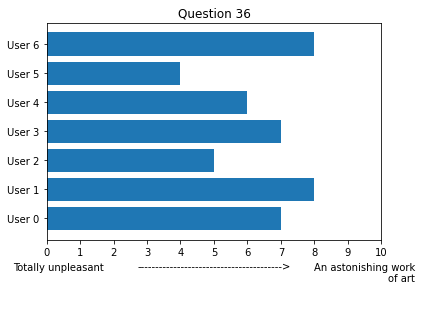

\subsection{Overall experience: How much did you enjoy the performance?} \label{sec:survey-question-37}


\begin{figure}[H]
\centering
\includegraphics[width=0.55\linewidth]{media/img/results/8-survey/survey-question-37.pdf}
\caption{Question 37: Overall experience: How much did you enjoy the performance?}
\label{fig:survey-question-37}
\end{figure}



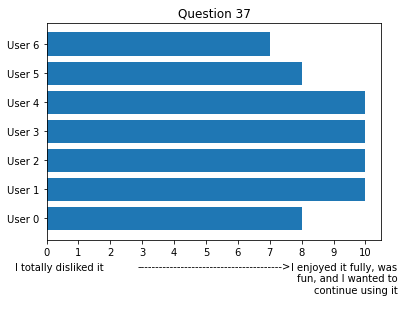

\subsection{Final question: What is your reflection, comments, suggestions and all your thinking about the system and your experience with it?} \label{sec:survey-question-38}


\begin{table}[H]
\centering
\begin{tabular}{|p{0.1\linewidth}||p{0.9\linewidth}|}
\hline
{} &                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [101]:
print('\\chapter{User Survey} \\label{appendix:survey}\n\n')
for i in range(0, len(questions_limits)):
    if i == 0:
        continue
    if i == 1:
        print('\\section{Musical Background} \\label{appendix:sec:musicalbackground}\n\n')
    if i == 11:
        print('\\section{Extended Reality (XR) Technology Experience} \\label{appendix:sec:xrexperience}\n\n')
    if i == 13:
        print('\\section{Music Session Experience} \\label{appendix:sec:surveymusicsession}\n\n')
    range_question(i)
    yesno_question(i)
    open_question(i)
    options_xr_question(i)